<a href="https://colab.research.google.com/github/ProfAI/machine-learning-fondamenti/blob/main/4%20-%20Overfitting%20e%20Tecniche%20di%20Regolarizzazione/regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tecniche di Regolarizzazione

In [3]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
RANDOM_SEED = 0

In [35]:
def evaluate_model(model, dataset):

  X, y = dataset

  y_pred = model.predict(X)

  print(f"MSE: {mean_squared_error(y, y_pred):.3f}")
  print(f"R2: {r2_score(y, y_pred):.3f}")

In [36]:
X, y = make_regression(n_samples=100, n_features=100, n_informative=10, n_targets=1, bias=0.0, tail_strength=0.5, noise=10.0, random_state=RANDOM_SEED)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_SEED)

In [37]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### Ordinary Least Regression

In [38]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [39]:
evaluate_model(lr, (X_train, y_train))

MSE: 0.000
R2: 1.000


In [40]:
evaluate_model(lr, (X_test, y_test))

MSE: 12139.621
R2: 0.218


### Ridge Regression

In [61]:
from sklearn.linear_model import Ridge

In [62]:
model = Ridge(alpha=1.)
model.fit(X_train, y_train)

Ridge()

In [63]:
evaluate_model(model, (X_train, y_train))

MSE: 6.870
R2: 1.000


In [64]:
evaluate_model(model, (X_test, y_test))

MSE: 11894.633
R2: 0.234


### Lasso Regression

In [41]:
from sklearn.linear_model import Lasso

In [45]:
model = Lasso(alpha=1.)
model.fit(X_train, y_train)

Lasso()

In [46]:
evaluate_model(model, (X_train, y_train))

MSE: 59.894
R2: 0.996


In [47]:
evaluate_model(model, (X_test, y_test))

MSE: 93.840
R2: 0.994


### Learning curve

In [67]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import seaborn as sns

train_sizes_abs, train_scores, test_scores = learning_curve(Lasso(), X, y, random_state=RANDOM_SEED)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.124e+01, tolerance: 1.044e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.148e+01, tolerance: 4.230e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


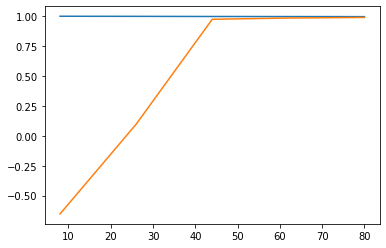

In [68]:
plt.plot(train_sizes_abs, train_scores.mean(axis=1))
plt.plot(train_sizes_abs, test_scores.mean(axis=1))
plt.show()